# Stepwise

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Importación de variables

In [2]:
import pandas as pd

wine = pd.read_csv('winequality-red.csv', sep = ';')
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Preparación de los datos
  
Se divide el conjunto de variables en uno de prueba y otra test.  

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# Separación de la variable objetivo y las explicativas
target = 'quality'
features = list(wine.columns)
features.remove('quality')

x = wine[features]
y = wine[target]

# Obtencion del conjunto de datos para validación
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Forward selection

In [4]:
from sklearn.linear_model import LinearRegression

# Modelo para realizar los ajustes
model = LinearRegression()

# Variable para almecena los índices de la lista de atributos usados
feature_order =  []
feature_error = []

# Iteración sobre todas las variables
for i in range(len(features)):
    idx_try = [val for val in range(len(features)) if val not in feature_order]
    iter_error = []

    for i_try in idx_try:
        useRow = feature_order[:]
        useRow.append(i_try)

        use_train = []
        for row in x_train:
            use_train.append([row[i] for i in useRow])

        use_test = []
        for row in x_test:
            use_test.append([row[i] for i in useRow])

        model.fit(use_train, y_train)
        rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/sqrt(len(y_test))
        iter_error.append(rmsError)

    pos_best = numpy.argmin(iter_error)
    feature_order.append(idx_try[pos_best])
    feature_error.append(iter_error[pos_best])

for i in range(len(features)):
    print "En el paso", i, "se ha insertado la varible", features[feature_order[i]], "con un error", feature_error[i]

En el paso 0 se ha insertado la varible alcohol con un error 0.717175141252
En el paso 1 se ha insertado la varible volatile acidity con un error 0.671486120274
En el paso 2 se ha insertado la varible total sulfur dioxide con un error 0.666083734412
En el paso 3 se ha insertado la varible sulphates con un error 0.661145970595
En el paso 4 se ha insertado la varible free sulfur dioxide con un error 0.660294037377
En el paso 5 se ha insertado la varible pH con un error 0.658311106834
En el paso 6 se ha insertado la varible citric acid con un error 0.658005048855
En el paso 7 se ha insertado la varible fixed acidity con un error 0.657146395029
En el paso 8 se ha insertado la varible density con un error 0.65791131677
En el paso 9 se ha insertado la varible chlorides con un error 0.658461528965
En el paso 10 se ha insertado la varible residual sugar con un error 0.664810869802


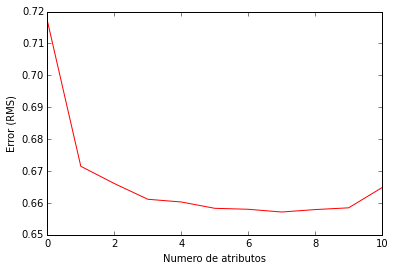

In [5]:
plot(range(len(features)), feature_error, 'r-', label = 'Datos')

xlabel('Numero de atributos')
ylabel('Error (RMS)')

### Función con  criterio de parada

In [8]:
def forward_regression(x, y):
    # Obtencion del conjunto de datos para validación
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Modelo para realizar los ajustes
    model = LinearRegression()

    # Variable para almecena los índices de la lista de atributos usados
    feature_list = list(x.columns)
    feature_order = []
    feature_error = []
    feature_names = []

    # Iteración sobre todas las variables
    for i in range(len(feature_list)):
        idx_try = [val for val in range(len(feature_list)) if val not in feature_order]
        iter_error = []

        for i_try in idx_try:
            useRow = feature_order[:]
            useRow.append(i_try)

            use_train = []
            for row in x_train:
                use_train.append([row[i] for i in useRow])

            use_test = []
            for row in x_test:
                use_test.append([row[i] for i in useRow])

            model.fit(use_train, y_train)
            rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/sqrt(len(y_test))
            iter_error.append(rmsError)

        pos_best = numpy.argmin(iter_error)
        
        if len(feature_error) == 0 or (iter_error[pos_best] < feature_error[-1]):
            feature_order.append(idx_try[pos_best])
            feature_error.append(iter_error[pos_best])
            feature_names.append(feature_list[idx_try[pos_best]])
            print "Paso", len(feature_error), "variable", feature_list[idx_try[pos_best]], "con RMS", iter_error[pos_best]
        else:
            return feature_names, feature_error, feature_names

    return feature_names, feature_order, feature_error

forward_regression(x, y)

Paso 1 variable alcohol con RMS 0.683255853902
Paso 2 variable volatile acidity con RMS 0.634630027669
Paso 3 variable sulphates con RMS 0.626795696919
Paso 4 variable chlorides con RMS 0.623190012375
Paso 5 variable pH con RMS 0.622311739383
Paso 6 variable citric acid con RMS 0.620846685276
Paso 7 variable free sulfur dioxide con RMS 0.620349040817


(['alcohol',
  'volatile acidity',
  'sulphates',
  'chlorides',
  'pH',
  'citric acid',
  'free sulfur dioxide'],
 [0.68325585390217247,
  0.63463002766856158,
  0.62679569691945514,
  0.62319001237499183,
  0.62231173938277329,
  0.62084668527585607,
  0.62034904081697273],
 ['alcohol',
  'volatile acidity',
  'sulphates',
  'chlorides',
  'pH',
  'citric acid',
  'free sulfur dioxide'])